In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# positive_feed.xlsx
# negative_feed.xlsx

In [2]:
positive_feed_data = pd.read_excel(io=r'./positive_feed.xlsx')
negative_feed_data = pd.read_excel(io=r'./negative_feed.xlsx')
positive_feed_data.head(3)

,date,爱心,安定,安全,安然无恙,安泰,霸主,百里挑一,百炼成钢,榜首,...,赚大钱,赚钱,卓越,自告奋勇,自主,最好,最佳,最牛,尊敬,做多
0,2021-10-16,112204,4,6505933,0,34702,7,0,2,0,...,0,0,340,0,0,0,0,0,0,0
1,2021-10-17,157939,2,9455985,0,218037,7,0,4,0,...,0,0,3422,0,0,0,0,0,0,0
2,2021-10-18,155054,0,5599418,0,5399,0,0,0,0,...,0,0,604,0,0,0,0,0,0,0


In [3]:
negative_feed_data.head(3)

,date,阿斗,哀鸿遍野,白痴,败笔,败诉,包袱,抱怨,暴跌,暴风雨,...,自以为是,纵容,走低,走后门,阻力,最差,罪人,左右为难,做空,做作
0,2021-10-16,9869,0,0,4,0,0,145,32,315,...,0,0,0,42,0,0,467,127,0,0
1,2021-10-17,215,0,0,0,0,0,9,4,367,...,0,0,0,44,0,0,112,109,12,0
2,2021-10-18,142,0,0,0,0,0,0,0,320,...,0,0,0,9,0,0,145,70,0,0


移除所有没有被搜索过的条目

In [4]:
positive_feed_removed = positive_feed_data.loc[:, (positive_feed_data != 0).any(axis=0)]
negative_feed_removed = negative_feed_data.loc[:, (negative_feed_data != 0).any(axis=0)]
positive_feed_removed.head(3)

,date,爱心,安定,安全,安然无恙,安泰,霸主,百里挑一,百炼成钢,榜首,...,赚大钱,赚钱,卓越,自告奋勇,自主,最好,最佳,最牛,尊敬,做多
0,2021-10-16,112204,4,6505933,0,34702,7,0,2,0,...,0,0,340,0,0,0,0,0,0,0
1,2021-10-17,157939,2,9455985,0,218037,7,0,4,0,...,0,0,3422,0,0,0,0,0,0,0
2,2021-10-18,155054,0,5599418,0,5399,0,0,0,0,...,0,0,604,0,0,0,0,0,0,0


In [5]:
negative_feed_removed.head(3)

,date,阿斗,白痴,败笔,包袱,抱怨,暴跌,暴风雨,暴力,暴利,...,自私,自以为是,纵容,走低,走后门,阻力,罪人,左右为难,做空,做作
0,2021-10-16,9869,0,4,0,145,32,315,0,0,...,0,0,0,0,42,0,467,127,0,0
1,2021-10-17,215,0,0,0,9,4,367,0,0,...,0,0,0,0,44,0,112,109,12,0
2,2021-10-18,142,0,0,0,0,0,320,0,0,...,0,0,0,0,9,0,145,70,0,0


构建 index

在这个函数中，对数据中的每一行进行了min-max归一化，之后求和，作为pos和neg的part index

In [6]:
def cal_index(data):
    feed_ = data.copy()
    feed_.set_index(["date"], inplace=True)
    feed_ = feed_.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)),axis=1)
    l = list(feed_.apply(lambda x: x.sum(),axis=1))
    feed_['Col_sum'] = l
    feed_index = pd.DataFrame(data = l, columns = ['column'])
    feed_index.set_index(feed_.index, inplace=True)
    return feed_index

In [7]:
positive_feed_index = cal_index(positive_feed_removed)
negative_feed_index = cal_index(negative_feed_removed)
positive_feed_index.head(3)

,column
date,
2021-10-16,2.492842
2021-10-17,2.662933
2021-10-18,2.218174


In [8]:
negative_feed_index.head(3)

,column
date,
2021-10-16,2.963338
2021-10-17,2.118656
2021-10-18,1.970699


合并两个part index 通过减法的方式合成最终的index

In [9]:
index_ = positive_feed_index.copy()
index_["pos"] = index_["column"]
index_["neg"] = negative_feed_index["column"]
index_.drop(['column'],axis=1,inplace=True)
index_["index"] = index_["pos"] - index_["neg"]
index = index_.copy().drop(['pos','neg'],axis=1)
index.head(10)

,index
date,
2021-10-16,-0.470496
2021-10-17,0.544278
2021-10-18,0.247475
2021-10-19,0.228833
2021-10-20,0.120207
2021-10-21,0.428977
2021-10-22,0.876856
2021-10-23,1.189650
2021-10-24,1.099551


对最近30天的数据进行绘图

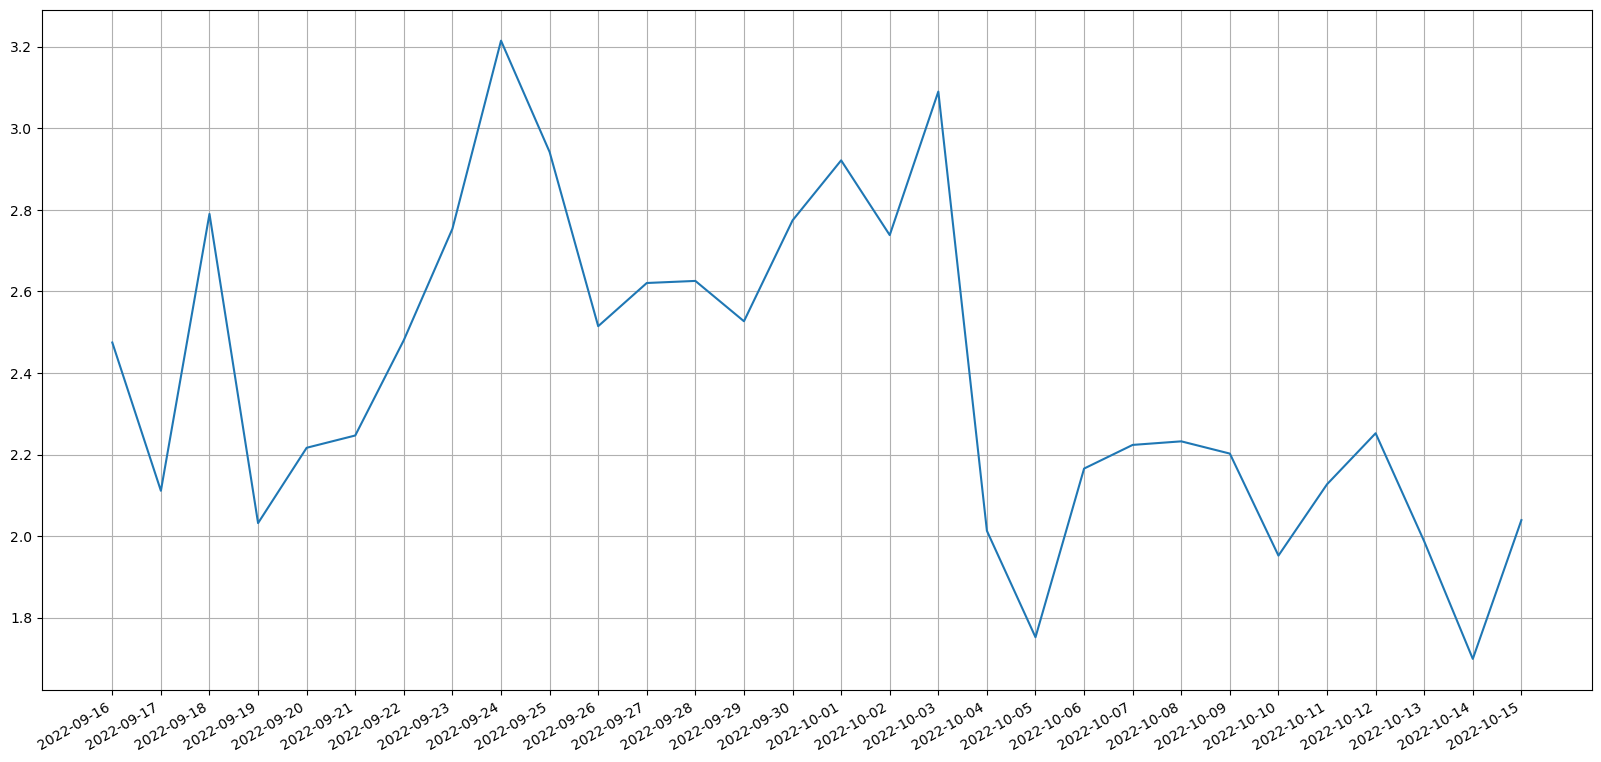

In [10]:
plot = index.tail(30) # 可以调整括号内的数据对不同的天数绘图
plt.figure(num = 3,figsize = (20,10))
plt.plot(plot)
plt.grid()
plt.gcf().autofmt_xdate()
plt.savefig("index.jpg")
plt.show()